In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
players = pd.read_csv("WorldCupMatches.csv")
matches = pd.read_csv("WorldCupPlayers.csv")
world_cup = pd.read_csv("WorldCups.csv")

In [4]:
players.head()


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
players.tail()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN
37783,255959,300186501,ARG,SABELLA Alejandro (ARG),N,23,BASANTA,NaN,NaN


In [8]:
matches.dropna(subset=["Year", "Home Team Name"], inplace=True)

In [9]:
players.dropna(subset=["Position","Event"], inplace=True)

In [10]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [11]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
Germany                       34
Netherlands                   32
France                        31
Spain                         30
Uruguay                       28
Sweden                        27
Soviet Union                  18
Belgium                       18
Hungary                       18
Yugoslavia                    17
Portugal                      16
Poland                        16
Mexico                        16
USA                           15
Chile                         14
Korea Republic                14
Austria                       13
Switzerland                   12
Cameroon                      11
Paraguay                      11
Czechoslovakia                10
Japan                         10
Romania                        9
Scotland                       9
Nigeria                        9
          

In [12]:
names = matches["Home Team Name"].str.contains(pat = 'rn\">')
names

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
822    False
823    False
824    False
825    False
826    False
827    False
828    False
829    False
830    False
831    False
832    False
833    False
834    False
835    False
836    False
837    False
838    False
839    False
840    False
841    False
842    False
843    False
844    False
845    False
846    False
847    False
848    False
849    False
850    False
851    False
Name: Home Team Name, Length: 852, dtype: bool

In [13]:
names = matches[matches["Home Team Name"].str.contains('rn\">')]["Home Team Name"].value_counts()
names

rn">Republic of Ireland       5
rn">Serbia and Montenegro     1
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [14]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Serbia and Montenegro',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Bosnia and Herzegovina']

In [15]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Serbia and Montenegro',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Bosnia and Herzegovina']

In [16]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [17]:
wrong = wrong + old_name
correct = correct + new_name

In [18]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">Serbia and Montenegro',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'Serbia and Montenegro',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [19]:
for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [20]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

In [21]:
winner = world_cup['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
France       1
England      1
Spain        1
Name: Winner, dtype: int64

In [22]:
runnerup = world_cup['Runners-Up'].value_counts()
runnerup

Germany           4
Netherlands       3
Argentina         3
Italy             2
Hungary           2
Brazil            2
Czechoslovakia    2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [23]:
third = world_cup['Third'].value_counts()
third

Germany        4
France         2
Brazil         2
Sweden         2
Poland         2
Italy          1
Croatia        1
Austria        1
Portugal       1
Chile          1
Turkey         1
Netherlands    1
USA            1
Name: Third, dtype: int64

In [24]:
teams = pd.concat([winner, runnerup, third], axis=1, sort=False)
teams.fillna(0, inplace=True)
teams = teams.astype('int64')
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
France,1,1,2
England,1,0,0
Spain,1,0,0
Netherlands,0,3,1
Hungary,0,2,0


In [25]:
# # teams = teams.sort_values(by=['Winner', 'Runners-Up', 'Third'], ascending=False)
# teams
# type(teams)


from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [26]:
# teams.plot(y=['Winner', 'Runners-Up', 'Third'], kind="bar", 
#                   color =['gold','silver','brown'], figsize=(20, 7), fontsize=14,
#                  width=0.8, align='center')

# plt.xlabel('Countries')
# plt.ylabel('Trophies')
# plt.title('FIFA World Cup Winning Count')

teams.iplot(kind = 'bar', xTitle='Teams', yTitle='Count', title='FIFA World Cup Winning Count')


In [27]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [28]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [29]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [30]:
goals = home.append(away, ignore_index = True)

In [31]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
Belgium,54.0
Bolivia,1.0
Bosnia and Herzegovina,4.0
Brazil,225.0


In [32]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
Spain,92.0
Netherlands,91.0
Hungary,87.0
Uruguay,80.0


In [33]:
# goals[:25].plot(y=['Goals'], kind="bar", 
#                   color =['blue'], figsize=(15, 6), fontsize=14,
#                  width=0.8, align='center')
# plt.xlabel('Countries')
# plt.ylabel('Goals')
# plt.title('Number of goals scored by country')

goals[:20].iplot(kind='bar', xTitle = 'Country Names', yTitle = 'Goals', title = 'Countries Hits Number of Goals')

In [34]:
world_cup['Attendance'] = world_cup['Attendance'].str.replace(".", "").astype(int)

In [35]:
world_cup['Year'].astype(int)

0     1930
1     1934
2     1938
3     1950
4     1954
5     1958
6     1962
7     1966
8     1970
9     1974
10    1978
11    1982
12    1986
13    1990
14    1994
15    1998
16    2002
17    2006
18    2010
19    2014
Name: Year, dtype: int32

In [36]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


Text(0.5, 1.0, 'Matches Played Scored by Teams Per Year')

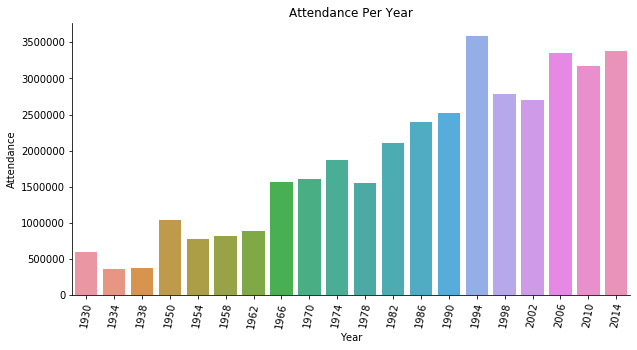

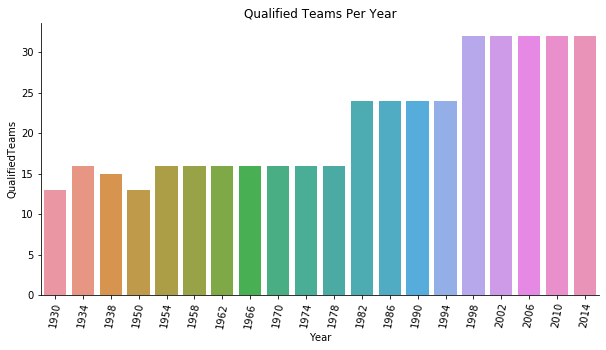

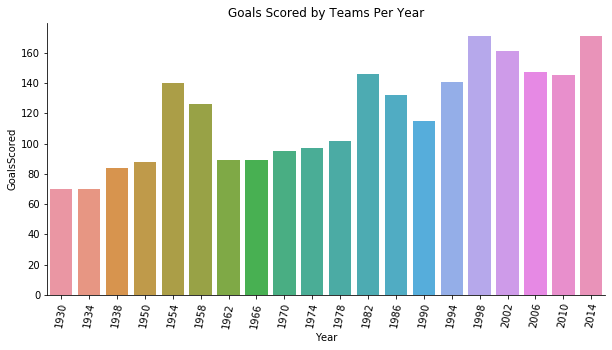

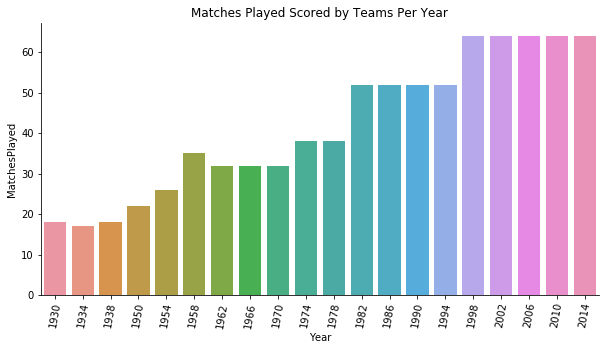

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot( 'Year', 'Attendance', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title("Attendance Per Year")

#==========================================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

#==========================================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')


#==========================================


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cup)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played Scored by Teams Per Year')


In [38]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [39]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name        
1930.0  Argentina                 16.0
        Brazil                     4.0
        Chile                      4.0
        France                     4.0
        Paraguay                   1.0
        Romania                    3.0
        USA                        6.0
        Uruguay                   15.0
        Yugoslavia                 6.0
1934.0  Austria                    5.0
        Czechoslovakia             8.0
        Germany                   10.0
        Hungary                    4.0
        Italy                     12.0
        Spain                      3.0
        Sweden                     3.0
        Switzerland                3.0
1938.0  Brazil                    13.0
        Cuba                       5.0
        Czechoslovakia             3.0
        France                     3.0
        Hungary                   13.0
        Italy                     11.0
        Sweden                     8.0
        Switzerland              

In [40]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name        
1930.0  Argentina                  2.0
        Belgium                    0.0
        Bolivia                    0.0
        Brazil                     1.0
        Chile                      1.0
        France                     0.0
        Mexico                     4.0
        Paraguay                   0.0
        Peru                       1.0
        Romania                    0.0
        USA                        1.0
        Yugoslavia                 1.0
1934.0  Argentina                  2.0
        Austria                    2.0
        Belgium                    2.0
        Brazil                     1.0
        Czechoslovakia             1.0
        Egypt                      2.0
        France                     2.0
        Germany                    1.0
        Hungary                    1.0
        Netherlands                2.0
        Romania                    1.0
        Spain                      1.0
        Sweden                   

In [41]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
1930.0 Argentina                18.0
       Belgium                   0.0
       Bolivia                   0.0
       Brazil                    5.0
       Chile                     5.0
       France                    4.0
       Mexico                    4.0
       Paraguay                  1.0
       Peru                      1.0
       Romania                   3.0
       USA                       7.0
       Uruguay                  15.0
       Yugoslavia                7.0
1934.0 Argentina                 2.0
       Austria                   7.0
       Belgium                   2.0
       Brazil                    1.0
       Czechoslovakia            9.0
       Egypt                     2.0
       France                    2.0
       Germany                  11.0
       Hungary                   5.0
       Italy                    12.0
       Netherlands               2.0
       Romania                   1.0
       Spain                     4.0
       Sweden                    4.0
       Switzerland               5.0
       USA                       1.0
1938.0 Belgium                   1.0
...                              ...
2014.0 Australia                 3.0
       Belgium                   8.0
       Bosnia and Herzegovina    4.0
       Brazil                   15.0
       Cameroon                  1.0
       Chile                     7.0
       Colombia                 15.0
       Costa Rica                6.0
       Croatia                   6.0
       C�te d'Ivoire             4.0
       Ecuador                   3.0
       England                   2.0
       France                   12.0
       Germany                  29.0
       Ghana                     4.0
       Greece                    4.0
       Honduras                  1.0
       IR Iran                   1.0
       Italy                     2.0
       Japan                     2.0
       Korea Republic            3.0
       Mexico                    6.0
       Netherlands              20.0
       Nigeria                   3.0
       Portugal                  4.0
       Russia                    2.0
       Spain                     4.0
       Switzerland               7.0
       USA                       6.0
       Uruguay                   4.0

[427 rows x 1 columns]

In [42]:
 goals = goals.reset_index()

In [43]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0
5,1930.0,France,4.0
6,1930.0,Mexico,4.0
9,1930.0,Romania,3.0
7,1930.0,Paraguay,1.0


In [44]:
top5 = goals.groupby('Year').head(5)
top5.head(20)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [45]:
import plotly.graph_objects as go

In [46]:
x, y = goals['Year'].values, goals['Goals'].values

In [47]:
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
data

[Bar({
     'name': 'Argentina',
     'x': array([1930., 1974., 1978., 1986., 1998., 2006., 2010.]),
     'y': array([18.,  9., 15., 14., 10., 11., 10.])
 }), Bar({
     'name': 'Uruguay', 'x': array([1930., 1950., 1954., 2010.]), 'y': array([15., 15., 16., 11.])
 }), Bar({
     'name': 'USA', 'x': array([1930.]), 'y': array([7.])
 }), Bar({
     'name': 'Yugoslavia', 'x': array([1930., 1950., 1962., 1974., 1990.]), 'y': array([ 7.,  7., 10., 12.,  8.])
 }), Bar({
     'name': 'Brazil',
     'x': array([1930., 1938., 1950., 1958., 1962., 1970., 1978., 1982., 1994., 1998.,
                 2002., 2006., 2010., 2014.]),
     'y': array([ 5., 14., 22., 16., 14., 19., 10., 15., 11., 14., 18., 10.,  9., 15.])
 }), Bar({
     'name': 'Italy',
     'x': array([1934., 1938., 1970., 1978., 1982., 1990., 2006.]),
     'y': array([12., 11., 10.,  9., 12., 10., 12.])
 }), Bar({
     'name': 'Germany',
     'x': array([1934., 1954., 1958., 1966., 1970., 1974., 1978., 1982., 1990., 2002.,
          

In [48]:

layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()

In [49]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [50]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y'))

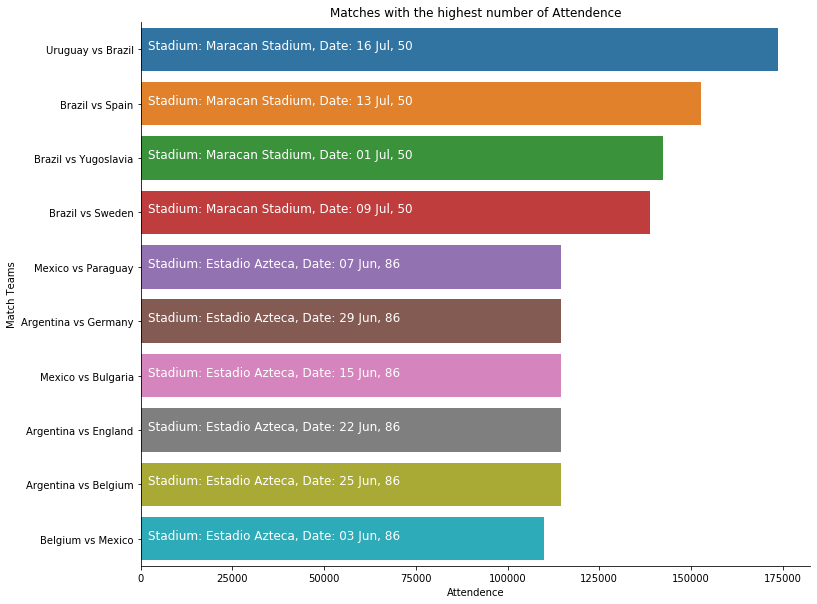

In [51]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

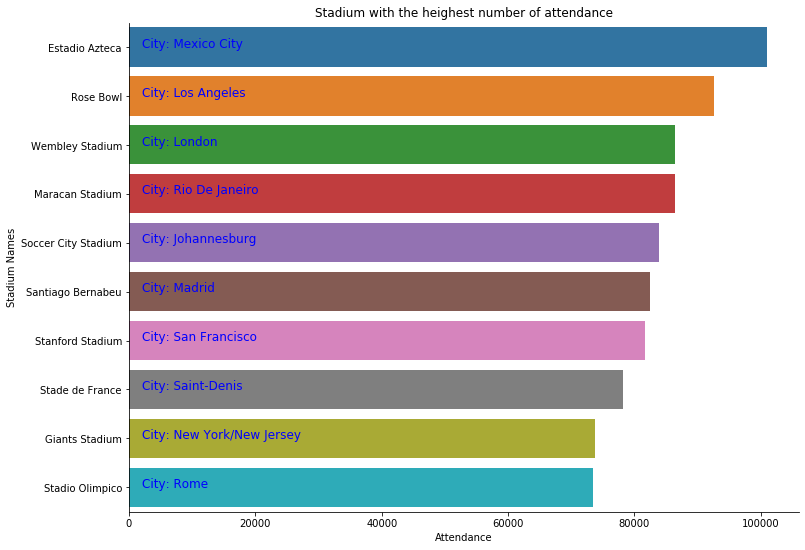

In [52]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')
        
plt.show()


In [53]:
matches['City'].value_counts()[:20].iplot(kind = 'bar')

In [54]:
world_cup.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


Text(0.5, 1.0, 'Number of podium by country')

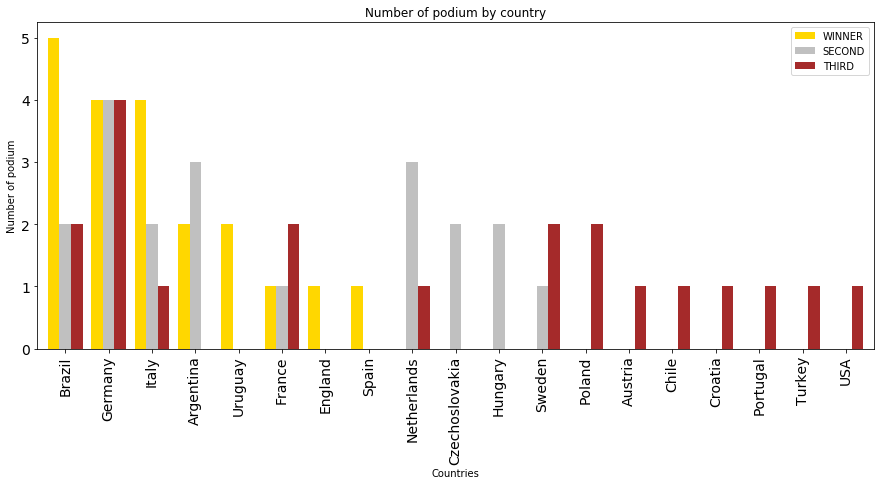

In [55]:
gold = world_cup["Winner"]
silver = world_cup["Runners-Up"]
bronze = world_cup["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')


In [56]:
podium_count
type(podium_count)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

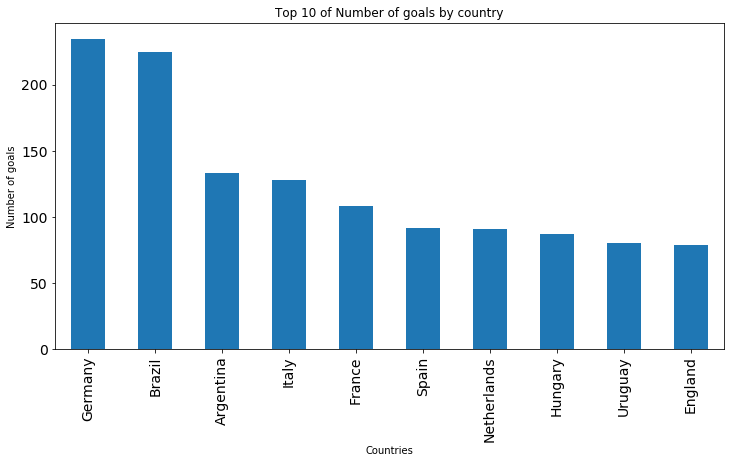

In [57]:
#world_cups_matches['Win conditions'].value_counts()
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')

In [58]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [59]:
matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)

In [60]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
0,1930,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 30",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 30",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 30",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [61]:
mt = matches['outcome'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: outcome, dtype: int64

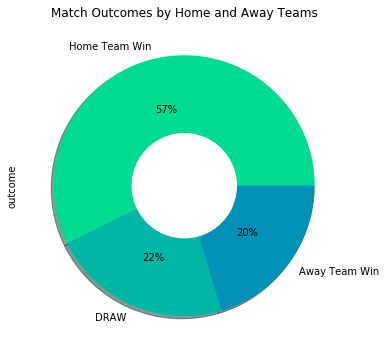

In [62]:
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()

In [63]:
fig = px.bar(x=['a', 'b', 'c'], y=[1,3,2])
fig.show()

NameError: name 'px' is not defined